In [157]:
import pandas as pd
import numpy as np

In [158]:
df_train = pd.read_csv("../../data/train.csv")
df_train.drop(columns=["id"], inplace=True)
df_train["defects"].replace({True: 1, False: 0}, inplace=True)
df_train.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,0
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,0
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,0
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,1
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,0


In [159]:
X = df_train.drop(columns=["defects"])
y = df_train["defects"]

In [160]:
from sklearn import model_selection

In [161]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, random_state=1)

In [162]:
print(f"""
      X_train={X_train.shape}, 
      y_train={y_train.shape}, 
      X_test={X_test.shape}, 
      y_test={y_test.shape}
""")


      X_train=(71234, 21), 
      y_train=(71234,), 
      X_test=(30529, 21), 
      y_test=(30529,)



In [163]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [164]:
model = DecisionTreeClassifier()

In [165]:
cv = RepeatedStratifiedKFold(
    n_splits=10, 
    n_repeats=3, 
    random_state=1
)

In [166]:
param_grid = {
    "criterion": ["gini", "entropy", "log_loss"], 
    "splitter": ["best", "random"], 
    "max_depth": [10, 20, 30, 40, 50, 60, 70], 
    "max_features": np.arange(1, 20, 1), 
    "max_leaf_nodes": np.arange(2, 10, 1)
}

In [168]:
model = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    n_jobs=-1, 
    cv=cv, 
    scoring="roc_auc", 
    verbose=10, 
    return_train_score=True
)

In [169]:
model.fit(X_train, y_train)

c:\GitHub\Binary-Classification-with-a-Software-Defects-Dataset\venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
23940 fits failed out of a total of 215460.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
23940 fits failed with the following error:
Traceback (most recent call last):
  File "c:\GitHub\Binary-Classification-with-a-Software-Defects-Dataset\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\GitHub\Binary-Classification-with-a-Software-Defects-Dataset\venv\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\GitHub\Binary-Classification-with

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70],
                         'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'max_leaf_nodes': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'splitter': ['best', 'random']},
             scoring='roc_auc')

In [170]:
model.best_params_

{'criterion': 'entropy',
 'max_depth': 60,
 'max_features': 19,
 'max_leaf_nodes': 9,
 'splitter': 'best'}

In [171]:
model.best_score_

0.7794555432242553

In [172]:
res = model.predict_proba(X_test)

In [173]:
result = model.predict(X_test)

In [174]:
from sklearn import metrics

In [175]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, res[:,1])

In [176]:
import matplotlib.pyplot as plt

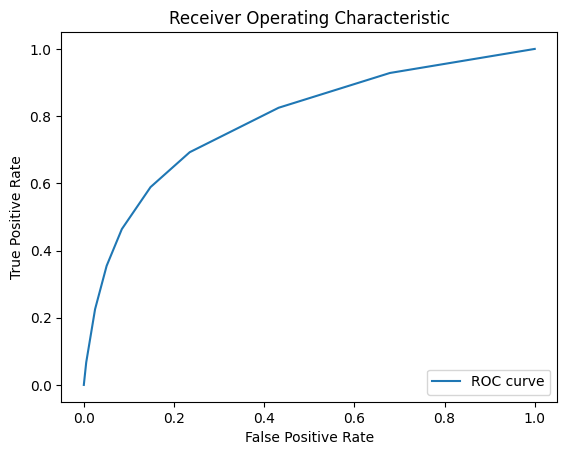

In [177]:
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

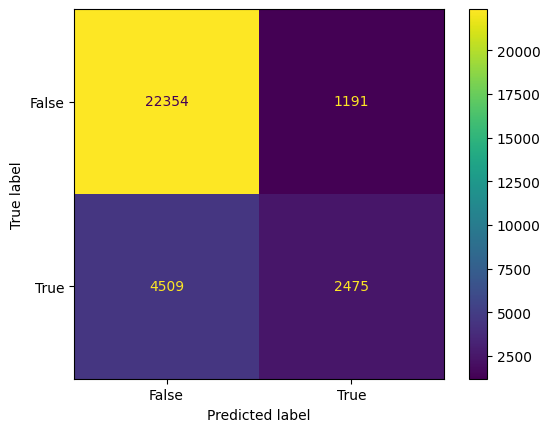

In [178]:
confusion_matrix = metrics.confusion_matrix(y_test, result)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [179]:
df_test = pd.read_csv("../../data/test.csv")
id = df_test["id"]
df_test.drop(columns=["id"], inplace=True)

In [180]:
res = model.predict_proba(df_test)

In [182]:
df_submission = pd.DataFrame(data={'id': id ,'defects': res[:,1]})
df_submission.to_csv('submission.csv', index=False)

TypeError: type numpy.ndarray doesn't define __round__ method